<a href="https://colab.research.google.com/github/JS19563255/2022bioinfo1_project/blob/main/myownproject/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')
## 실습용 Bioconda 환경 설치하기
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

##추가 필요한 프로그램 설치
!conda install -y bedtools bioawk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
./root/.vimrc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: | / - \ done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [46]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [47]:
import pandas as pd
import numpy as np

In [49]:
ls

bedgraph                            read-counts.txt
bedgraph1.BedGraph                  read-counts.txt.summary
bedgraph1.pdf                       RNA-control.bam
CLIP-35L33G.bam                     RNA-control.bam.bai
CLIP-35L33G.bam.bai                 RNA-siLin28a.bam
CLIP-35L33G.pileup                  RNA-siLin28a.bam.bai
CLIP-let7g.bam                      RNA-siLuc.bam
CLIP-let7g-gene.pileup              RNA-siLuc.bam.bai
CLIP-let7g.pileup                   RPF-siLin28a.bam
colab-biolab/                       RPF-siLin28a.bam.bai
filtered_CLIP-35L33G.pileup         RPF-siLuc.bam
fivepcounts-filtered-RPF-siLuc.txt  RPF-siLuc.bam.bai
gencode.gtf


In [ ]:
!samtools mpileup CLIP-35L33G.bam > CLIP-35L33G.pileup
!wc -l CLIP-35L33G.pileup

[mpileup] 1 samples in 1 input files
^C
^C


In [50]:
!head CLIP-35L33G.pileup

chr1	3056473	N	4	^!G^!G^!G^!G	HGGI
chr1	3056474	N	4	AAAA	HB@I
chr1	3056475	N	4	AAAA	GG?I
chr1	3056476	N	4	TTTT	HGGH
chr1	3056477	N	4	GGGG	HEGI
chr1	3056478	N	4	GGGG	GEEI
chr1	3056479	N	4	AAAA	EA=I
chr1	3056480	N	4	AAAA	@AEH
chr1	3056481	N	4	GGGG	GFFI
chr1	3056482	N	4	TTTT	G=BG


In [ ]:
!awk '$4 > 50 {print $0;}' CLIP-35L33G.pileup > filtered_CLIP-35L33G.pileup
!wc -l filtered_CLIP-35L33G.pileup

^C
^C


In [51]:
!head filtered_CLIP-35L33G.pileup

chr1	3222722	N	124	CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A^!A	HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GIH@HEIHDIHDIIGHFFGFIIHI@HIGHIIIIIIIIGGBIBHHIHDGIIHBIF=GDDHIHGIHDHIHGBGBFGGHHGGF
chr1	3222723	N	146	GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G^!G	E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GII@@HIHGIIEIIGIH0DIIIHIDHIBGIIIIIIIIIF?IBHHIHDGIIHGIBGEHDEI1HGHHEHFIGB@GH>GHDE>IGHIBHIEGGHGBGHGIGIDII
chr1	3222724	N	155	AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A^!A

In [52]:
import pandas as pd
filtered_pileup = pd.read_csv('filtered_CLIP-35L33G.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
filtered_pileup.tail()

,chrom,pos,_ref,count,basereads,quals
3606426,chr2,101866120,N,74,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<...,HDHHIHHIIHIFGHGHG:H>HIEGE?HBEIE33HFH@HH:;BBGGH...
3606427,chr2,101866121,N,74,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<...,HDHHIHHIIHIFGHGHG:H>HIEGE?HBEIE33HFH@HH:;BBGGH...
3606428,chr2,101866122,N,74,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<...,HDHHIHHIIHIFGHGHG:H>HIEGE?HBEIE33HFH@HH:;BBGGH...
3606429,chr2,101866123,N,74,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<...,HDHHIHHIIHIFGHGHG:H>HIEGE?HBEIE33HFH@HH:;BBGGH...
3606430,chr2,101866124,N,74,<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<...,HDHHIHHIIHIFGHGHG:H>HIEGE?HBEIE33HF


In [53]:
filtered_pileup.head()

,chrom,pos,_ref,count,basereads,quals
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...
1,chr1,3222723,N,146,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GI...
2,chr1,3222724,N,155,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,H>GIGHHIHHDG:@IIIBIHDIIHG=HHDDG;IHHH;IIIDG?DIE...
3,chr1,3222725,N,157,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,HGDEHHIIHHIG?DIIIEIGDIIHDBBH=DI;IIHBBIII4GD3GI...
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...


논문과 같이 depth 50 이하는 cutoff

In [54]:
import math

def shannon_entropy(sequence_input):

    input_base = set(sequence_input)
    M   =  len(sequence_input)
    entropy_list = []
    for base in input_base:
        n_i = sequence_input.count(base)
        P_i = n_i/float(M) 
        entropy_i = P_i*(math.log(P_i,2))
        entropy_list.append(entropy_i)

    sh_entropy = -(sum(entropy_list))

    return sh_entropy

pileup에서 계산에 사용할 match와 substitution만 남기고 나머지 제거 및 shannon entropy 계산 

In [55]:
import re
toremove = re.compile('[<>$*#^]')
filtered_pileup['matches'] = filtered_pileup['basereads'].apply(lambda x: toremove.sub('', x))
filtered_pileup['entropy']= filtered_pileup['matches'].apply(shannon_entropy)
filtered_pileup.head()

,chrom,pos,_ref,count,basereads,quals,matches,entropy
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...,CCCAAAAAAAAAAAAAAAAAAAAAAAAA!A!A!A!A!A!A!A!A!A...,1.080934
1,chr1,3222723,N,146,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.545662
2,chr1,3222724,N,155,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,H>GIGHHIHHDG:@IIIBIHDIIHG=HHDDG;IHHH;IIIDG?DIE...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.351828
3,chr1,3222725,N,157,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,HGDEHHIIHHIG?DIIIEIGDIIHDBBH=DI;IIHBBIII4GD3GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,0.203572
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164


entropy plot을 보고 cutoff값을 설정하고자 하였으나 디스크 사용범위 때문에 대략적으로 1.0정도에서 cutoff함

In [56]:
final_data_pileup = filtered_pileup[(filtered_pileup['entropy'] >= 1.0)]
final_data_pileup.head()

,chrom,pos,_ref,count,basereads,quals,matches,entropy
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...,CCCAAAAAAAAAAAAAAAAAAAAAAAAA!A!A!A!A!A!A!A!A!A...,1.080934
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164
45,chr1,3224575,N,170,CCCCC-1NCCCCC-1NCTCTCC-1NCCCCCCCCCCC-1NC-1NCCC...,DGI8DGDGHIGIHIIGBHH>IGEBII=GA3D8FIGH;AGGE@BB8G...,CCCCC-1NCCCCC-1NCTCTCC-1NCCCCCCCCCCC-1NC-1NCCC...,1.057954
46,chr1,3224576,N,168,CCCG*GGGG*GGGGC*GGGGGGGGGG**GGGGGCTCTGCCCCCCCG...,BGI?H?G8HIEGHIIIBIHFIE9GIIG?=E?:HHGBA8GCB??0GH...,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116
65,chr1,3664216,N,100,tTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTttt...,G82@H:@7@@DEE99>E2GDDIBHF93FGEEG:GG@H787:79D85...,tTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTttt...,1.561140


In [ ]:
final_data_pileup.entropy.plot.bar()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f58c6db63b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
bedgraph = final_data_pileup[["chrom", "pos"]].copy()
bedgraph["start"] = bedgraph["pos"]
bedgraph["end"] = bedgraph["start"] + 1
bedgraph["value"] = final_data_pileup["entropy"]
bedgraph = bedgraph[["chrom", "start", "end",  "value"]]
bedgraph


,chrom,start,end,value
0,chr1,3222722,3222723,1.080934
4,chr1,3222726,3222727,1.401164
45,chr1,3224575,3224576,1.057954
46,chr1,3224576,3224577,1.261116
65,chr1,3664216,3664217,1.561140
...,...,...,...,...
3605141,chr2,101864835,101864836,1.729574
3605940,chr2,101865634,101865635,1.760964
3605944,chr2,101865638,101865639,1.352030
3605949,chr2,101865643,101865644,1.566067


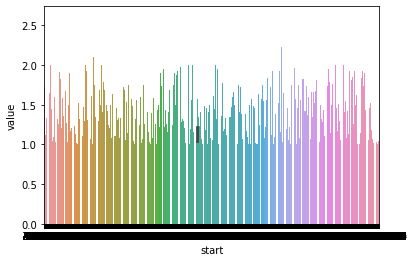

In [ ]:
import seaborn as sns
sns.barplot(x="start", y="value", data=bedgraph)

In [ ]:
bedgraph.to_csv('bedgraph1.BedGraph',index=False,header=False,sep=' ')

In [62]:
ls

bedgraph                            gencode.gtf
bedgraph1.BedGraph                  read-counts.txt
bedgraph1.pdf                       read-counts.txt.summary
bedgraph1.png                       RNA-control.bam
CLIP-35L33G.bam                     RNA-control.bam.bai
CLIP-35L33G.bam.bai                 RNA-siLin28a.bam
CLIP-35L33G.pileup                  RNA-siLin28a.bam.bai
CLIP-let7g.bam                      RNA-siLuc.bam
CLIP-let7g-gene.pileup              RNA-siLuc.bam.bai
CLIP-let7g.pileup                   RPF-siLin28a.bam
colab-biolab/                       RPF-siLin28a.bam.bai
filtered_CLIP-35L33G.pileup         RPF-siLuc.bam
fivepcounts-filtered-RPF-siLuc.txt  RPF-siLuc.bam.bai


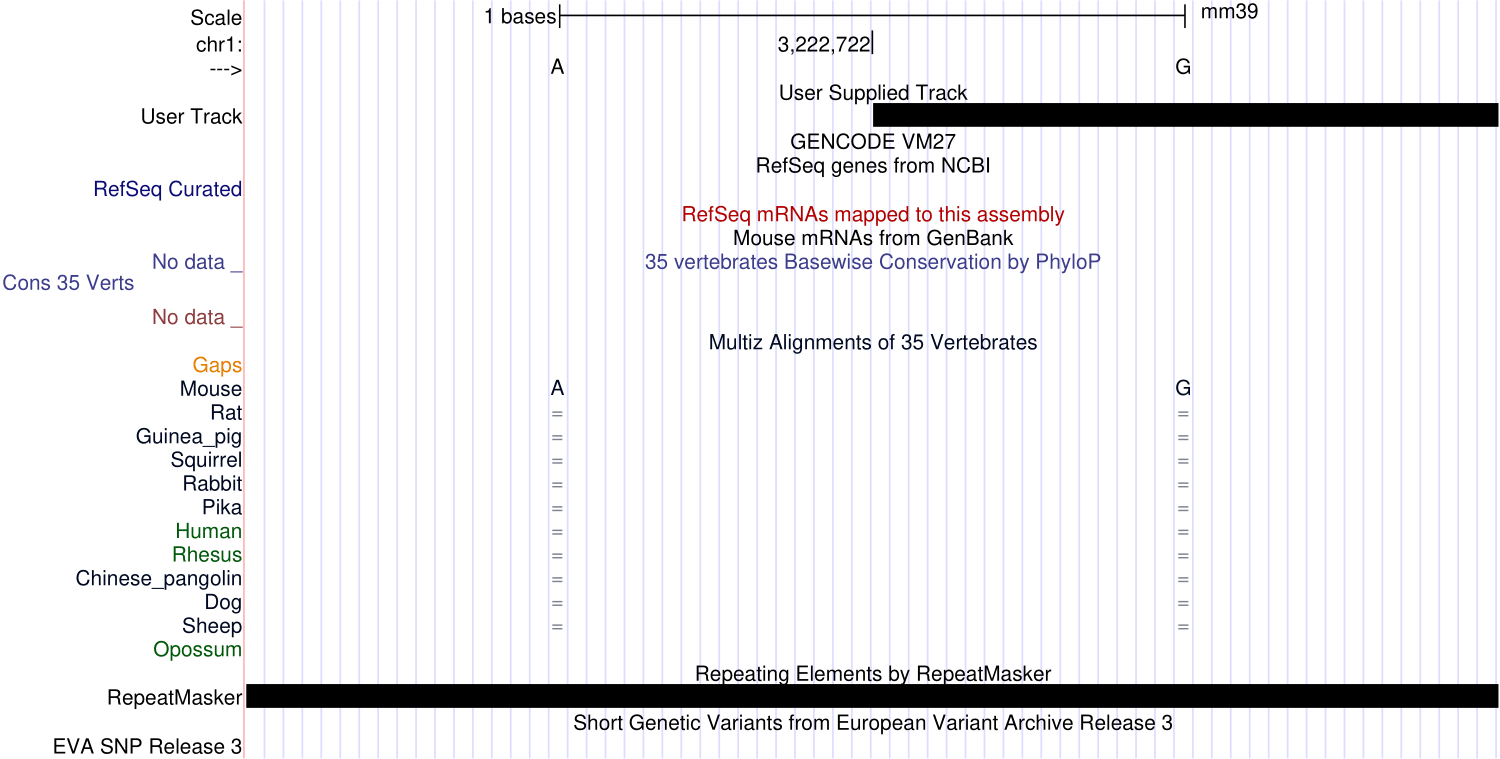

In [65]:
from IPython.display import Image
Image(filename='bedgraph1.png',width=700, height=400)